In [4]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error, r2_score
 import datetime

In [4]:
data = pd.read_csv(r'C:\Users\HP\Downloads\TCS_stock_history.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [6]:
# Check for null values
print(data.isnull().sum())

# Convert numeric columns if required
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Fill any remaining NaN values using forward fill
data.ffill(inplace=True)


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


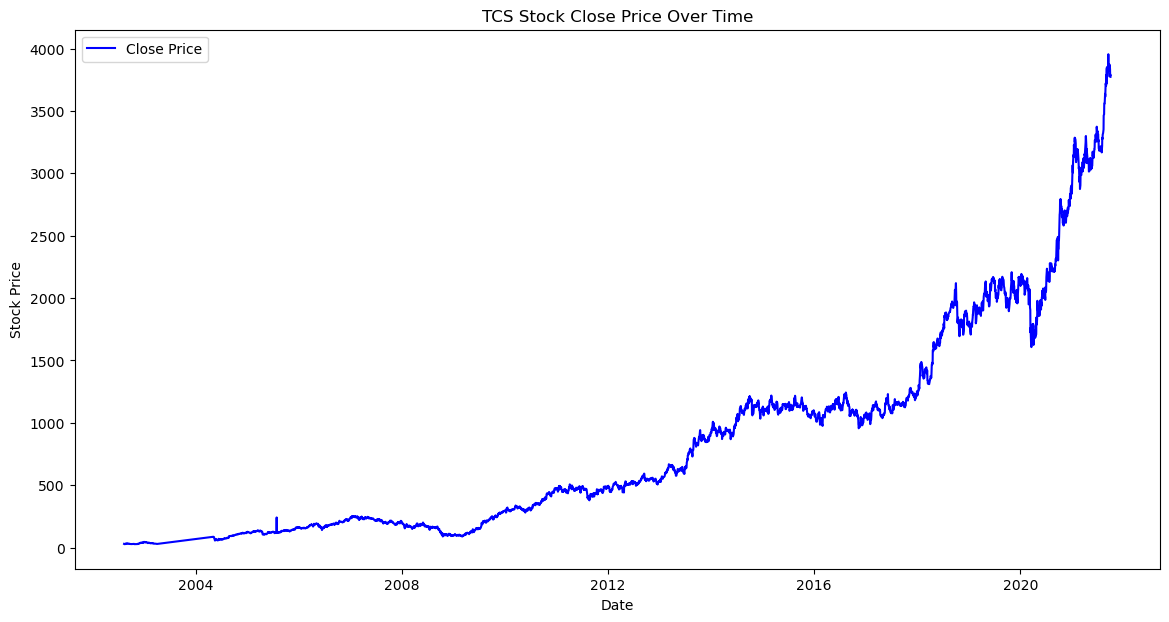

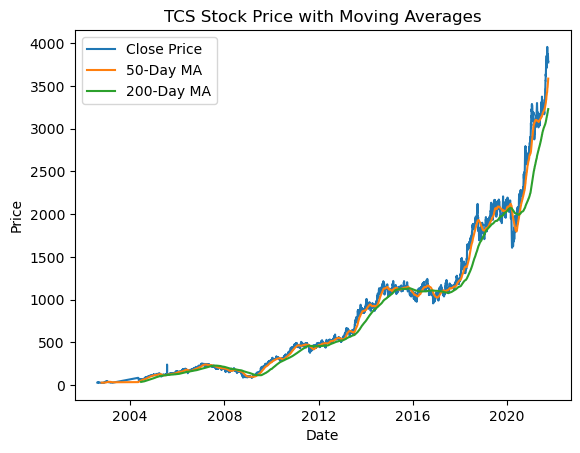

In [8]:
import matplotlib.pyplot as plt

# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

# Calculating 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot with Moving Averages
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')  # ✅ Fixed here
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()


In [9]:
# Feature Engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Lag Features
data['Prev_Close'] = data['Close'].shift(1)

# Drop rows with NaN values from shifting
data.dropna(inplace=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
X = data[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]
y = data['Close']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 39.04992998525297
R-Squared Score: 0.9999438356582192


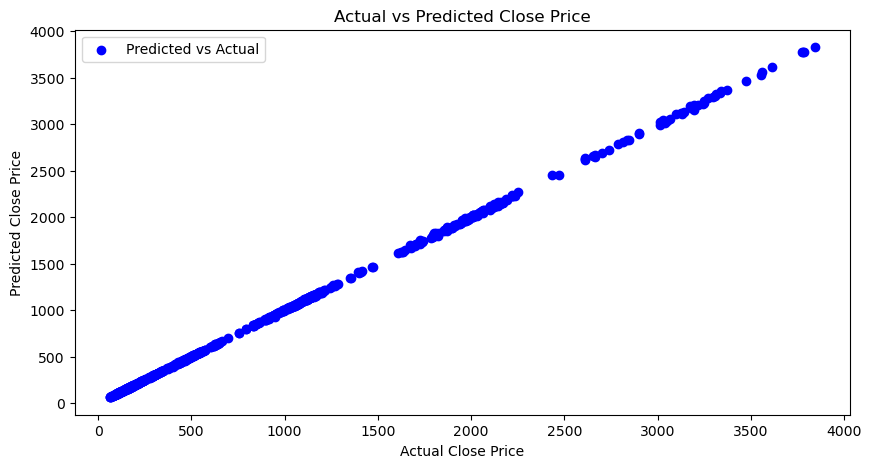

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


In [13]:
import pickle

# Save the trained model
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)
